In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('sanghamitra.csv')

# Display the first 5 rows of the dataset
print(df.head())


C:\Users\user\AppData\Local\Temp\ipykernel_10256\3027951960.py:4: DtypeWarning: Columns (8,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sanghamitra.csv')


   Unnamed: 0.1  Unnamed: 0        isbn  text_reviews_count      series  \
0        202553      202553   747597995                  29  ['155230']   
1        202554      202554   747598002                  48  ['163443']   
2        202555      202555  8532508928                   2          []   
3        202556      202556  2266262955                  16  ['374742']   
4        202557      202557   451236823                  53  ['303259']   

  country_code language_code  \
0           US         en-GB   
1           US         en-GB   
2           US           por   
3           US           fre   
4           US           NaN   

                                     popular_shelves asin  is_ebook  ...  \
0  [{'count': '4231', 'name': 'to-read'}, {'count...  NaN     False  ...   
1  [{'count': '7623', 'name': 'to-read'}, {'count...  NaN     False  ...   
2  [{'count': '1414', 'name': 'to-read'}, {'count...  NaN     False  ...   
3  [{'count': '3257', 'name': 'to-read'}, {'count...

In [2]:

summary_stats = df[['text_reviews_count', 'average_rating', 'ratings_count', 'publication_year']].describe()

# Print the summary statistics
print(summary_stats)


       text_reviews_count  average_rating  ratings_count  publication_year
count       101276.000000   101276.000000   1.012760e+05      92286.000000
mean            65.271121        3.904630   1.168575e+03       2007.431257
std            632.894374        0.336762   2.465855e+04        105.245154
min              0.000000        0.000000   0.000000e+00         13.000000
25%              3.000000        3.710000   1.400000e+01       2004.000000
50%              7.000000        3.920000   4.400000e+01       2010.000000
75%             22.000000        4.130000   1.690000e+02       2013.000000
max          59856.000000        5.000000   4.765497e+06      20115.000000


In [2]:
missing_values = df.isnull().sum()

# Display the number of missing values per column
print(missing_values)


Unnamed: 0.1                 0
Unnamed: 0                   0
isbn                         1
text_reviews_count           0
series                       0
country_code                 0
language_code            43709
popular_shelves              0
asin                    101275
is_ebook                     0
average_rating               0
kindle_asin              48187
similar_books                0
description                  0
format                    9397
link                         0
authors                      0
publisher                 9376
num_pages                14801
publication_day          21008
isbn13                    2517
publication_month        16410
edition_information      92094
publication_year          8990
url                          0
image_url                    0
book_id                      0
ratings_count                0
work_id                      0
title                        0
title_without_series         0
dtype: int64


In [4]:
missing_values = df.isnull().sum()

# Display the number of missing values per column
print(missing_values)


Unnamed: 0.1                 0
Unnamed: 0                   0
isbn                         1
text_reviews_count           0
series                       0
country_code                 0
language_code            43709
popular_shelves              0
asin                    101275
is_ebook                     0
average_rating               0
kindle_asin              48187
similar_books                0
description                  0
format                    9397
link                         0
authors                      0
publisher                 9376
num_pages                14801
publication_day          21008
isbn13                    2517
publication_month        16410
edition_information      92094
publication_year          8990
url                          0
image_url                    0
book_id                      0
ratings_count                0
work_id                      0
title                        0
title_without_series         0
dtype: int64


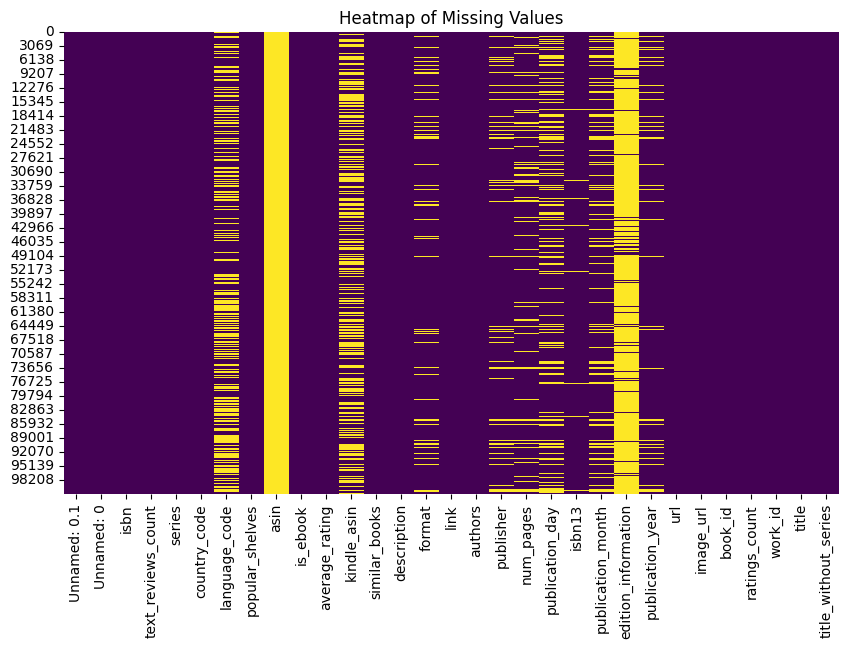

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


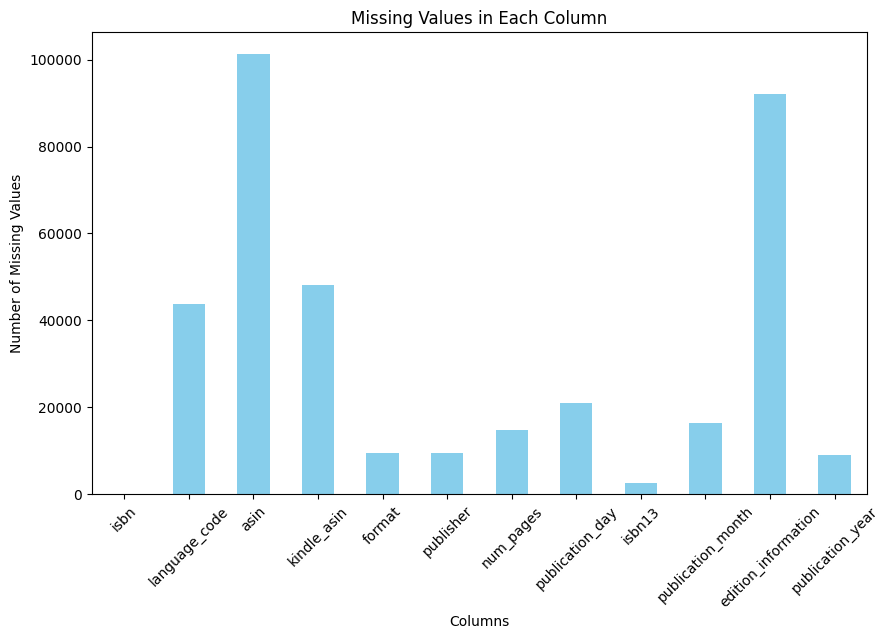

In [7]:
import matplotlib.pyplot as plt

missing_values = df.isnull().sum()

# Filter only columns with missing values
missing_values_filtered = missing_values[missing_values > 0]

# Create a bar plot
plt.figure(figsize=(10, 6))
missing_values_filtered.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Each Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


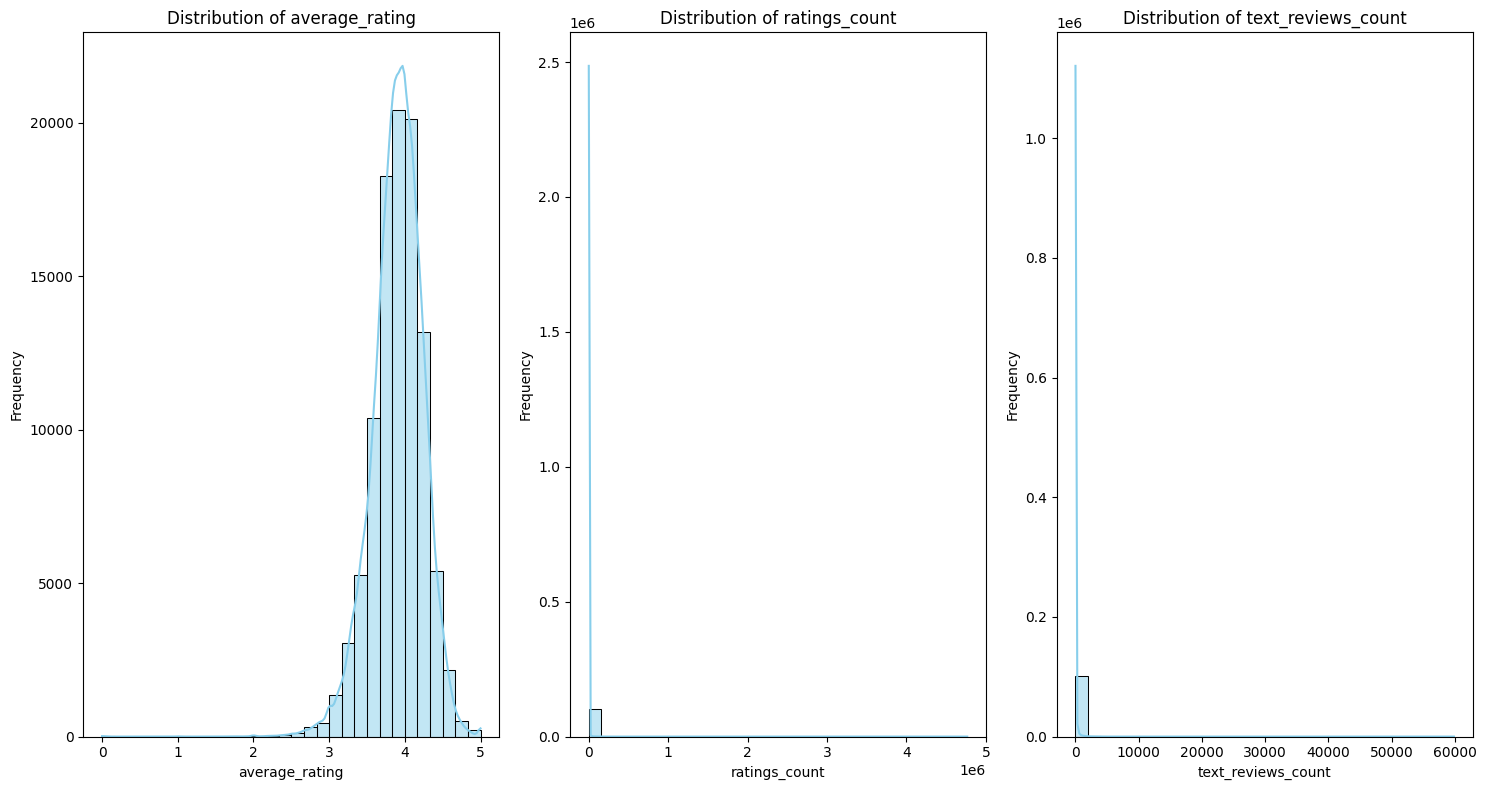

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Plot histograms for 'average_rating', 'ratings_count', and 'text_reviews_count'
numerical_columns = ['average_rating', 'ratings_count', 'text_reviews_count']

# Loop through each numerical column and create a histogram
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1)  # Arrange plots in 1 row and 3 columns
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


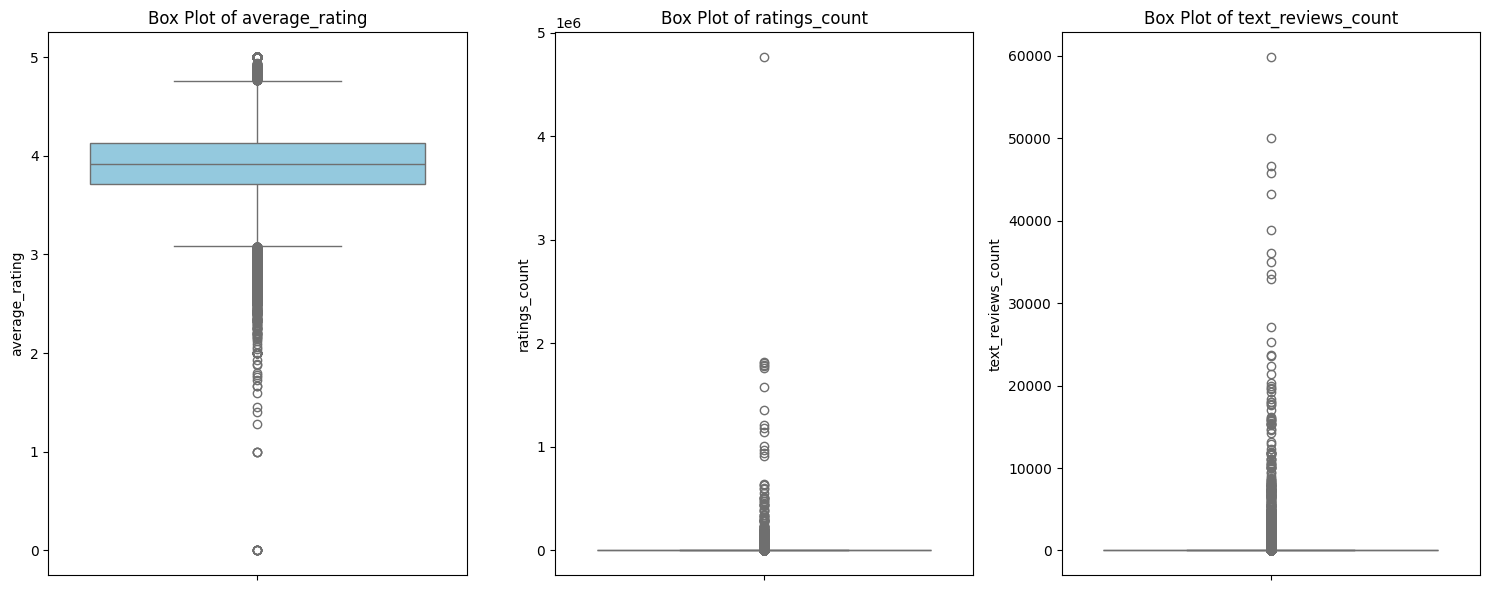

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 6))

# List of numerical columns
numerical_columns = ['average_rating', 'ratings_count', 'text_reviews_count']

# Loop through the numerical columns and create box plots
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1)  # Arrange plots in 1 row and 3 columns
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [10]:

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print the categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['isbn', 'series', 'country_code', 'language_code', 'popular_shelves',
       'asin', 'kindle_asin', 'similar_books', 'description', 'format', 'link',
       'authors', 'publisher', 'isbn13', 'edition_information', 'url',
       'image_url', 'title', 'title_without_series'],
      dtype='object')


In [11]:
categorical_columns = ['isbn', 'series', 'country_code', 'language_code', 'popular_shelves',
       'asin', 'kindle_asin', 'similar_books', 'description', 'format', 'link',
       'authors', 'publisher', 'isbn13', 'edition_information', 'url',
       'image_url', 'title', 'title_without_series']
# Loop through each categorical column and count the unique values
for col in categorical_columns:
    unique_values_count = df[col].nunique()
    print(f'Column: {col} | Unique Values: {unique_values_count}')


Column: isbn | Unique Values: 101275
Column: series | Unique Values: 32235
Column: country_code | Unique Values: 1
Column: language_code | Unique Values: 73
Column: popular_shelves | Unique Values: 76842
Column: asin | Unique Values: 1
Column: kindle_asin | Unique Values: 42037
Column: similar_books | Unique Values: 46041
Column: description | Unique Values: 94552
Column: format | Unique Values: 168
Column: link | Unique Values: 101276
Column: authors | Unique Values: 52792
Column: publisher | Unique Values: 14606
Column: isbn13 | Unique Values: 42607
Column: edition_information | Unique Values: 3260
Column: url | Unique Values: 101276
Column: image_url | Unique Values: 67684
Column: title | Unique Values: 85627
Column: title_without_series | Unique Values: 85627


In [12]:
unique_values_all_columns = df.nunique()

# Print the result
print("Unique values in each column:")
print(unique_values_all_columns)


Unique values in each column:
Unnamed: 0.1            101276
Unnamed: 0              101276
isbn                    101275
text_reviews_count        1700
series                   32235
country_code                 1
language_code               73
popular_shelves          76842
asin                         1
is_ebook                     2
average_rating             292
kindle_asin              42037
similar_books            46041
description              94552
format                     168
link                    101276
authors                  52792
publisher                14606
num_pages                 1299
publication_day             31
isbn13                   42607
publication_month           12
edition_information       3260
publication_year           127
url                     101276
image_url                67684
book_id                 101276
ratings_count             6025
work_id                  71418
title                    85627
title_without_series     85627
dtype: in

In [2]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['isbn', 'series', 'country_code', 'language_code', 'popular_shelves',
       'asin', 'kindle_asin', 'similar_books', 'description', 'format', 'link',
       'authors', 'publisher', 'isbn13', 'edition_information', 'url',
       'image_url', 'title', 'title_without_series'],
      dtype='object')


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sanghamitra.csv')

# Find numerical columns (integers and floats)
numerical_columns = df.select_dtypes(include=['number']).columns

# Print the numerical columns
print("Numerical Columns:")
print(numerical_columns)


C:\Users\user\AppData\Local\Temp\ipykernel_12700\1088603852.py:4: DtypeWarning: Columns (8,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sanghamitra.csv')


Numerical Columns:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'text_reviews_count', 'average_rating',
       'num_pages', 'publication_day', 'publication_month', 'publication_year',
       'book_id', 'ratings_count', 'work_id'],
      dtype='object')


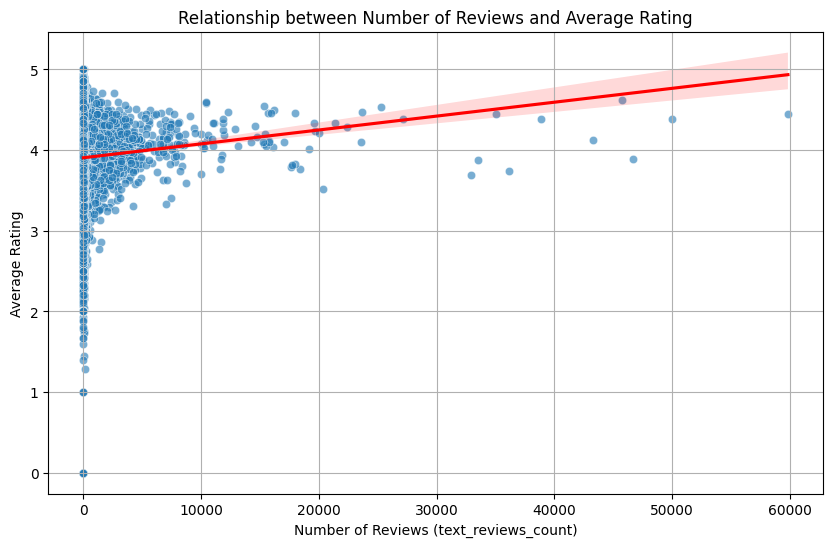

Correlation between text_reviews_count and average_rating: 0.03


In [3]:

import matplotlib.pyplot as plt
import seaborn as sns


# Drop rows with missing values in the relevant columns
df_clean = df[['text_reviews_count', 'average_rating']].dropna()

# Set up the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_reviews_count', y='average_rating', data=df_clean, alpha=0.6)
sns.regplot(x='text_reviews_count', y='average_rating', data=df_clean, scatter=False, color='red')

# Adding titles and labels
plt.title('Relationship between Number of Reviews and Average Rating')
plt.xlabel('Number of Reviews (text_reviews_count)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# Correlation analysis
correlation = df_clean['text_reviews_count'].corr(df_clean['average_rating'])
print(f'Correlation between text_reviews_count and average_rating: {correlation:.2f}')


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: View unique values in the popular_shelves column
unique_shelves = df['popular_shelves'].unique()
print("Unique values in popular_shelves:")
print(unique_shelves)

# Step 2: Count occurrences of each unique shelf
shelf_counts = df['popular_shelves'].value_counts()
print("\nCounts of each popular shelf:")
print(shelf_counts)

# Step 3: Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x=shelf_counts.index[:10], y=shelf_counts.values[:10], palette='viridis')  # Show top 10 shelves
plt.title('Top 10 Most Popular Shelves')
plt.xlabel('Popular Shelves')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Unique values in popular_shelves:
["[{'count': '4231', 'name': 'to-read'}, {'count': '1579', 'name': 'fantasy'}, {'count': '846', 'name': 'young-adult'}, {'count': '564', 'name': 'favorites'}, {'count': '361', 'name': 'ya'}, {'count': '290', 'name': 'currently-reading'}, {'count': '216', 'name': 'fiction'}, {'count': '204', 'name': 'series'}, {'count': '159', 'name': 'fairy-tales'}, {'count': '158', 'name': 'romance'}, {'count': '154', 'name': 'books-i-own'}, {'count': '104', 'name': 'adventure'}, {'count': '100', 'name': 'magic'}, {'count': '85', 'name': 'ya-fantasy'}, {'count': '82', 'name': 'shannon-hale'}, {'count': '81', 'name': 'owned'}, {'count': '79', 'name': 'teen'}, {'count': '68', 'name': 'fairy-tale'}, {'count': '59', 'name': 'young-adult-fiction'}, {'count': '47', 'name': 'childrens'}, {'count': '44', 'name': 'fairytales'}, {'count': '44', 'name': 'ya-fiction'}, {'count': '43', 'name': 'audiobook'}, {'count': '41', 'name': 'middle-grade'}, {'count': '37', 'name': 'sci-fi-f

C:\Users\user\AppData\Local\Temp\ipykernel_12700\4149002641.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shelf_counts.index[:10], y=shelf_counts.values[:10], palette='viridis')  # Show top 10 shelves


In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('sanghamitra.csv')


C:\Users\user\AppData\Local\Temp\ipykernel_3064\2952802924.py:4: DtypeWarning: Columns (8,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sanghamitra.csv')


In [2]:

duplicates = df[df.duplicated(keep=False)]  # `keep=False` will mark all duplicates, not just the first occurrence

# Step 2: Check how many duplicates exist
num_duplicates = duplicates.shape[0]

# Report the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

# Step 3: Display the duplicate rows for inspection
if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(duplicates)

# If you only want to check duplicates based on specific columns (e.g., 'title', 'authors'):
# duplicates = df[df.duplicated(subset=['title', 'authors'], keep=False)]


Number of duplicate rows: 0


Missing ISBN values: 1
Missing Book ID values: 0
Duplicate Book IDs: 0
Duplicate ISBNs: 0

Number of Book IDs with more than one ISBN: 0
Number of ISBNs with more than one Book ID: 0


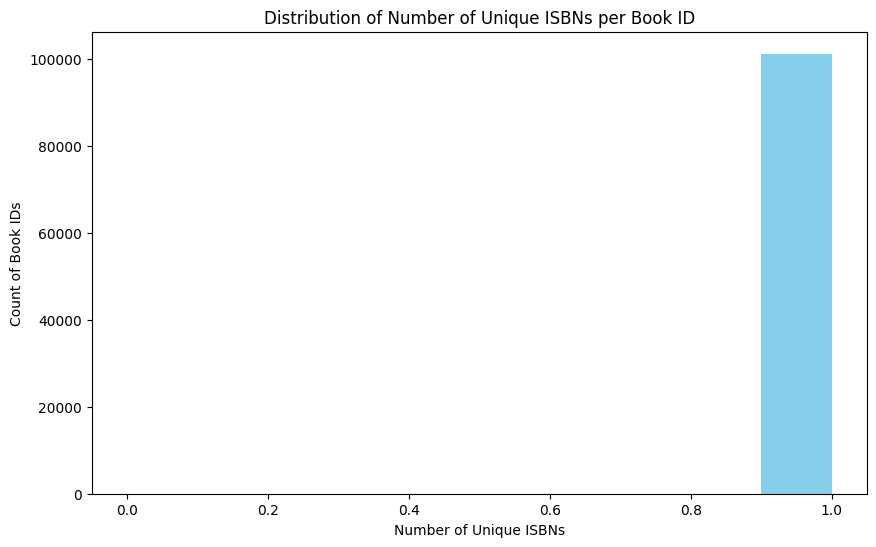

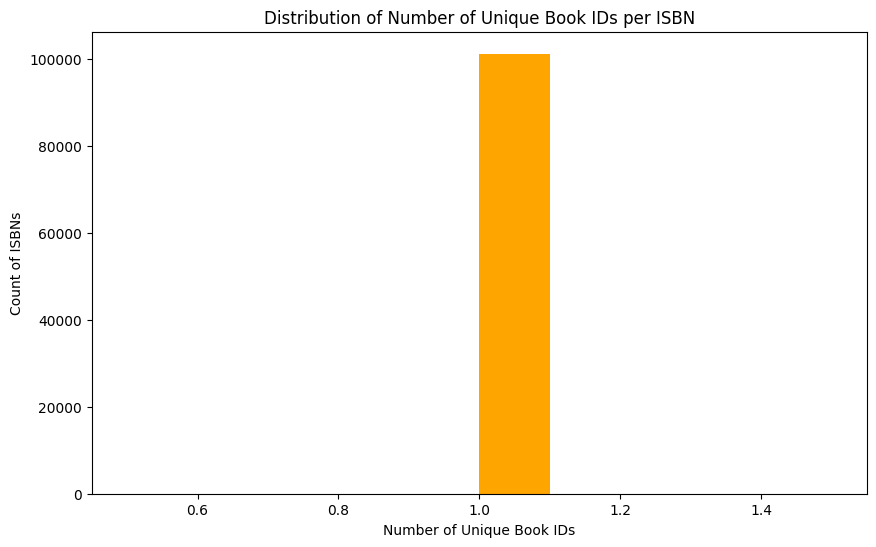

In [3]:

missing_isbn = df['isbn'].isna().sum()
missing_book_id = df['book_id'].isna().sum()

print(f"Missing ISBN values: {missing_isbn}")
print(f"Missing Book ID values: {missing_book_id}")

# Step 2: Check for duplicate Book IDs or ISBNs
duplicate_book_id = df['book_id'].duplicated().sum()
duplicate_isbn = df['isbn'].duplicated().sum()

print(f"Duplicate Book IDs: {duplicate_book_id}")
print(f"Duplicate ISBNs: {duplicate_isbn}")

# Step 3: Check if ISBN and Book ID have a one-to-one relationship
# Group by Book ID and see if there's more than one ISBN per Book ID
multiple_isbn_per_book_id = df.groupby('book_id')['isbn'].nunique()
more_than_one_isbn = multiple_isbn_per_book_id[multiple_isbn_per_book_id > 1]

# Group by ISBN and see if there's more than one Book ID per ISBN
multiple_book_id_per_isbn = df.groupby('isbn')['book_id'].nunique()
more_than_one_book_id = multiple_book_id_per_isbn[multiple_book_id_per_isbn > 1]

print(f"\nNumber of Book IDs with more than one ISBN: {more_than_one_isbn.count()}")
print(f"Number of ISBNs with more than one Book ID: {more_than_one_book_id.count()}")

# Step 4: Visualize the relationship (e.g., number of Book IDs with ISBNs)
import matplotlib.pyplot as plt

# Plot the distribution of the number of unique ISBNs per Book ID
plt.figure(figsize=(10, 6))
plt.hist(multiple_isbn_per_book_id, bins=10, color='skyblue')
plt.title('Distribution of Number of Unique ISBNs per Book ID')
plt.xlabel('Number of Unique ISBNs')
plt.ylabel('Count of Book IDs')
plt.show()

# Plot the distribution of the number of unique Book IDs per ISBN
plt.figure(figsize=(10, 6))
plt.hist(multiple_book_id_per_isbn, bins=10, color='orange')
plt.title('Distribution of Number of Unique Book IDs per ISBN')
plt.xlabel('Number of Unique Book IDs')
plt.ylabel('Count of ISBNs')
plt.show()


In [3]:
# Calculate the length of the 'description' column
df['description_length'] = df['description'].astype(str).apply(len)


In [4]:
# Sort by description length in descending order
longest_description = df.sort_values(by='description_length', ascending=False)
print("Book with the longest description:\n", longest_description[['title', 'description_length']].head(1))


Book with the longest description:
                title  description_length
41559  Flower Fables                8418


C:\Users\user\AppData\Local\Temp\ipykernel_12364\3914578821.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_longest_descriptions, x='description_length', y='title', palette='viridis')


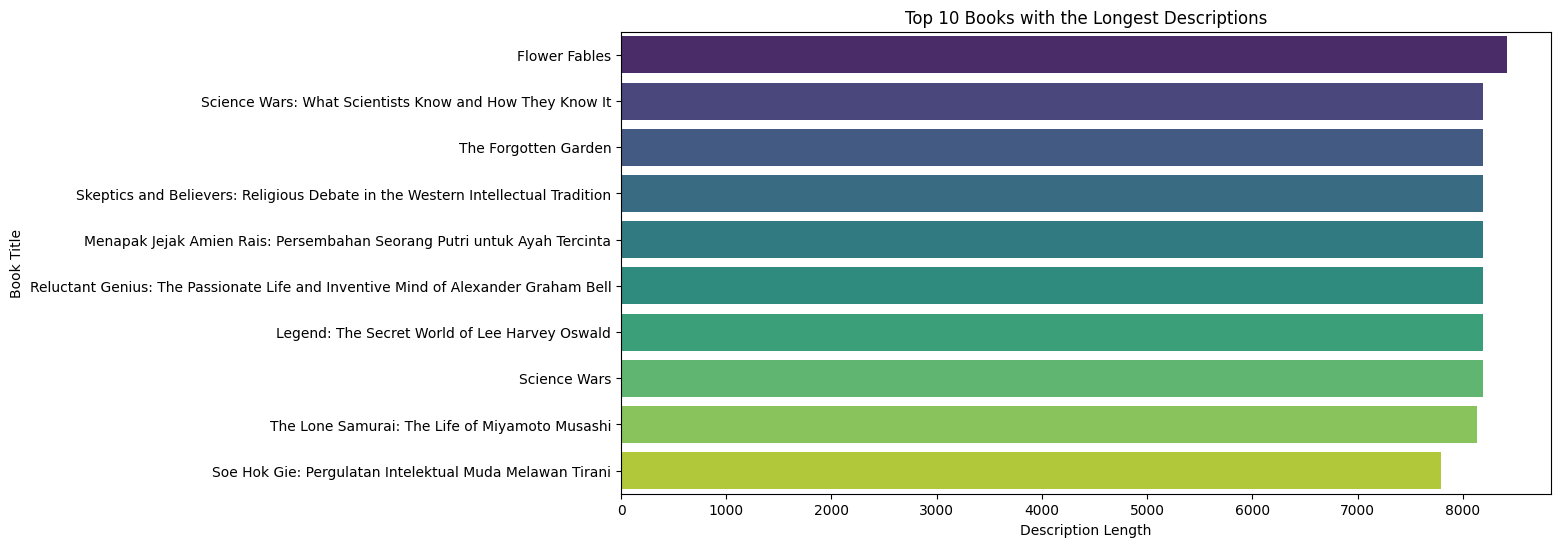

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 books with the longest descriptions
top_10_longest_descriptions = longest_description[['title', 'description_length']].head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_longest_descriptions, x='description_length', y='title', palette='viridis')
plt.xlabel('Description Length')
plt.ylabel('Book Title')
plt.title('Top 10 Books with the Longest Descriptions')
plt.show()


In [6]:
print(df[['description', 'description_length']].head())


                                         description  description_length
0  Enna's simple life changes for ever when she l...                 284
1  Anidora-Kiladra Talianna Isilee, Crown Princes...                 662
2  Anne Rice's Violin tells the story of two char...                 694
3  Belial vaincu, Penryn ne peut pas souffler pou...                 366
4  From the author of the Dragonfire Novels comes...                1077


In [7]:
# Identify text columns
text_columns = df.select_dtypes(include=['object', 'string']).columns
print("Text columns:", text_columns)


Text columns: Index(['isbn', 'series', 'country_code', 'language_code', 'popular_shelves',
       'asin', 'kindle_asin', 'similar_books', 'description', 'format', 'link',
       'authors', 'publisher', 'isbn13', 'edition_information', 'url',
       'image_url', 'title', 'title_without_series'],
      dtype='object')


In [8]:
# Calculate length of each text column and store in new columns
for col in text_columns:
    df[f'{col}_length'] = df[col].astype(str).apply(len)


In [9]:
# Display the first few rows with the new length columns
print(df[[*text_columns, *[f'{col}_length' for col in text_columns]]].head())


         isbn      series country_code language_code  \
0   747597995  ['155230']           US         en-GB   
1   747598002  ['163443']           US         en-GB   
2  8532508928          []           US           por   
3  2266262955  ['374742']           US           fre   
4   451236823  ['303259']           US           NaN   

                                     popular_shelves asin kindle_asin  \
0  [{'count': '4231', 'name': 'to-read'}, {'count...  NaN         NaN   
1  [{'count': '7623', 'name': 'to-read'}, {'count...  NaN  B002UM5BJG   
2  [{'count': '1414', 'name': 'to-read'}, {'count...  NaN         NaN   
3  [{'count': '3257', 'name': 'to-read'}, {'count...  NaN         NaN   
4  [{'count': '950', 'name': 'to-read'}, {'count'...  NaN         NaN   

                                       similar_books  \
0  ['5933646', '428300', '617810', '183656', '650...   
1  ['1210754', '963508', '41424', '3607543', '174...   
2  ['43796', '43802', '743125', '25190', '6340422...   


In [2]:
import pandas as pd

# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_columns)


Numerical columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'text_reviews_count', 'average_rating',
       'num_pages', 'publication_day', 'publication_month', 'publication_year',
       'book_id', 'ratings_count', 'work_id'],
      dtype='object')
